<a href="https://colab.research.google.com/github/geringer/ma-797/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MA 797 Homework #1

Note: For this assignment, you will code all problems in python. You may
use sci-kit learn unless specifically stated otherwise. When you email me your




In [0]:
import numpy as np

def generate_gaussian_classes(m, S, P, N):
  
  # m := 1xc matrix whose jth column corresponds to the mean of the jth class
  # S := 1x1xc matrix whose jth corresponds to the covariance of the jth class
  # P := x-demensional vecotr whose jth class is the priori prob of jth clas
  # N := total number of data vectors to be generated
  # Note: this may generate less than N values due to the floor function
  
  X = []
  y = []
  
  for j in range(len(m)):
    
    t = np.random.multivariate_normal( m[j], S[j], 333)#, int(P[j] * N))
    s = [j]*333
    
    X.append(t)
    y.append(s)
    
  X = np.vstack(X)
  y = np.vstack(y).flatten()
  return X, y

def euclidean_classifier(m, X):
  
  # m := 1xc matrix whose ith column corresponds to the mean of the ith class
  # X := 1xN matrix whose columns are the data vectors to be classified
  
  y_hat = []
  confidence = []
  
  for x in X:
    A = []
    
    for mean in m: 
      distance = (x - mean)
      A.append( np.sqrt( np.dot( np.transpose(distance), distance ) ) )
    
    guess = np.where(A == np.amin(A))
    y_hat.append(guess)
    
    prob = 1.0 - np.amin(A) / np.linalg.norm(A)
    confidence.append(prob)
  
  confidence_np = np.vstack(confidence)
  y_hat_np = np.vstack(y_hat)
  
  return np.hstack([y_hat_np, confidence_np])



def mahalanobis_classifier(m, S, X):
  
  # m := 1xc matric whose ith column is the mean of the ith class
  # S := 1x1 matrix corresponding to the matrix in the mahalonobis distance
  # X := 1xN whos columns are data vectors to be classfied
  
  y_hat = []
  confidence = []
  
  for x in X:
    
    A = []
    
    for i in range(len(m)):
      
      mean = m[i]
      distance = (x - mean)
      right = np.dot( np.linalg.inv(S[i,:,:]) , distance ) 
      A.append( np.sqrt( np.dot( np.transpose(distance), right ) ) )
      
    guess = np.where(A == np.amin(A))
    y_hat.append(guess)
    
    prob = 1.0 - np.amin(A) / np.linalg.norm(A)
    confidence.append(prob)
    
  confidence_np = np.vstack(confidence)
  y_hat_np = np.vstack(y_hat)
  
  return np.hstack([y_hat_np, confidence_np])



def bayesian_classifier(m, S, P, X):
  
  # m := lxc matrix whose jth column corresponds to the mean of the jth class
  # S := cxlxl matrix whose jth corresponds to the covariance of the jth class
  # P := x-demensional vecotr whose jth class is the priori prob of jth clas
  # N := total number of data vectors to be generated
  
  y_hat = []
  confidence = []
  
  for x in X:
    
    A = []
    
    for i in range(len(m)):
      
      mean = m[i]
      distance = (x - mean)
      not_dot = np.matmul(np.linalg.inv(S[i,:,:]), distance)
      exp_component = np.dot( np.transpose(distance), not_dot)
      
      det_S_inv = np.linalg.det(np.linalg.inv(S[i,:,:]))
      denominator = np.sqrt(2 * np.pi * det_S_inv) 
      value  = np.exp(-1/2 * exp_component) / denominator
      A.append(P[i] * value)
      
    guess = np.where(A == np.amax(A))
    y_hat.append(guess)
    
    prob = 1.0 - np.amin(A) / np.linalg.norm(A)
    confidence.append(prob)
    
  confidence_np = np.vstack(confidence)
  y_hat_np = np.vstack(y_hat)
  
  return np.hstack([y_hat_np, confidence_np])

def calculate_error(y_guess, y_truth):
  
  if y_guess.size != y_truth.size:
    print("Array size mismatch")

  total = len(y_guess)
  sum = 0.0
  
  for i in range(total):
    if y_guess[i] != y_truth[i]:
      sum += 1.0
      
  error = sum / float(total)
  
  return error


## Problem 1

Generate 2 data sets, X (training set) and X1 (test set), each consisting of N = 1000 3-d vectors that stem from three equiprobable classes w1, w2, and w3.

The classes are modeled by Gaussian distributions with means m1 = [0, 0, 0]T, m2 = [1, 2, 2]T,and m3 = [3, 3, 4]T, respectively; their covariance matrices are S1 = S2 = S3 = 0.8I.



In [0]:
m1 = np.array([0, 0, 0])
m2 = np.array([1, 2, 2])
m3 = np.array([3, 3, 4])
m = [m1, m2, m3]

s1 = np.array([
    [.8, 0, 0], 
    [0, .8, 0], 
    [0, 0, .8]])

s2 = s1
s3 = s1
S = np.stack([s1, s2, s3])

P = np.array([1, 1, 1])

N = 1000

X_train, y_train = generate_gaussian_classes(m, S, P, N)
X_test, y_test = generate_gaussian_classes(m, S, P, N)

### Problem 1(a)
Using X, compute the maximum likelihood estimates of the mean values and the co- variance matrices of the distributions of the three classes. Since the covariance matrices are known to the the same, estimate them for each class and compute their average. Use the latter as the estimate of the (common) covariance matrix.

In [0]:
m1_train = np.mean(X_train[0:333], axis = 0)
m2_train = np.mean(X_train[333:666], axis = 0)
m3_train = np.mean(X_train[666:999], axis = 0)

m_train = [m1_train, m2_train, m3_train]

s1_train = np.cov(X_train[0:333], rowvar = False)
s2_train = np.cov(X_train[333:666], rowvar = False)
s3_train = np.cov(X_train[666:999], rowvar = False)

S_train = np.stack([s1_train, s2_train, s3_train])
S_common = np.mean(S_train, axis = 0)

### Problem 1(b)

Use the Euclidean distance classifier to classify the points of X1 based on the ML estimates computed before. (Program your own classifier function.)



In [0]:
y_hat_euclidean = euclidean_classifier(m_train, X_test)

### Problem 1(c)

Use the Mahalonobis distance classifier to classify the points of X1 based on the ML estimates computes before. (Program your own classifier function.)

In [0]:
y_hat_mahalanobis = mahalanobis_classifier(m_train, S_train, X_test)

### Problem 1(d)

Use the Bayesian classifier to classify the points of X1 basedon the ML estimates com- puted before. (Program your own classifier function.)

In [0]:
y_hat_bayes = bayesian_classifier(m_train, S_train, P, X_test)

### Problem 1(e)

For each case, compute the error probability and compare the results (Why do all classifiers result in the same performance?)

In [0]:
euclidean_error = calculate_error(y_hat_euclidean[:,0], y_test)
print("The Euclidean Classifer has an error rate of ", euclidean_error * 100, "%")

mahalanobis_error = calculate_error(y_hat_mahalanobis[:,0], y_test)
print("The Mahalanobis Classifer has an error rate of ", mahalanobis_error * 100, "%")

bayes_error = calculate_error(y_hat_bayes[:,0], y_test)
print("The Bayesian Classifer has an error rate of ", bayes_error * 100, "%")

###INCLUDE ANALYSIS


The Euclidean Classifer has an error rate of  5.7057057057057055 %
The Mahalanobis Classifer has an error rate of  5.805805805805806 %
The Bayesian Classifer has an error rate of  5.605605605605605 %


## Problem 2

Repeat exercise (1) for (a) - (e) but now assume P1 = 0.5, P2 = P3 = 0.25
Generate X and X1.

In [0]:
m1 = np.array([0, 0, 0])
m2 = np.array([1, 2, 2])
m3 = np.array([3, 3, 4])
m = [m1, m2, m3]

s1 = np.array([
    [.8, 0, 0], 
    [0, .8, 0], 
    [0, 0, .8]])

s2 = s1
s3 = s1
S = np.stack([s1, s2, s3])

P = np.array([.5, .25, .25])

N = 1000

X_train, y_train = generate_gaussian_classes(m, S, P, N)
X_test, y_test = generate_gaussian_classes(m, S, P, N)

### Problem 2(a)
Using X, compute the maximum likelihood estimates of the mean values and the co- variance matrices of the distributions of the three classes. Since the covariance matrices are known to the the same, estimate them for each class and compute their average. Use the latter as the estimate of the (common) covariance matrix.

In [0]:
m1_train = np.mean(X_train[0:333], axis = 0)
m2_train = np.mean(X_train[333:666], axis = 0)
m3_train = np.mean(X_train[666:999], axis = 0)

m_train = [m1_train, m2_train, m3_train]

s1_train = np.cov(X_train[0:333], rowvar = False)
s2_train = np.cov(X_train[333:666], rowvar = False)
s3_train = np.cov(X_train[666:999], rowvar = False)

S_train = np.stack([s1_train, s2_train, s3_train])
S_common = np.mean(S_train, axis = 0)

### Problem 2(b)

Use the Euclidean distance classifier to classify the points of X1 based on the ML estimates computed before. (Program your own classifier function.)

In [0]:
y_hat_euclidean = euclidean_classifier(m_train, X_test)

### Problem 2(c)

Use the Mahalonobis distance classifier to classify the points of X1 based on the ML estimates computes before. (Program your own classifier function.)

In [0]:
y_hat_mahalanobis = mahalanobis_classifier(m_train, S_train, X_test)

### Problem 2(d)

Use the Bayesian classifier to classify the points of X1 basedon the ML estimates com- puted before. (Program your own classifier function.)

In [0]:
y_hat_bayes = bayesian_classifier(m_train, S_train, P, X_test)

### Problem 2(e)

For each case, compute the error probability and compare the results (Why does the Bayesian classifier result in the best performance?)

In [0]:
euclidean_error = calculate_error(y_hat_euclidean[:,0], y_test)
print("The Euclidean Classifer has an error rate of ", euclidean_error * 100, "%")

mahalanobis_error = calculate_error(y_hat_mahalanobis[:,0], y_test)
print("The Mahalanobis Classifer has an error rate of ", mahalanobis_error * 100, "%")

bayes_error = calculate_error(y_hat_bayes[:,0], y_test)
print("The Bayesian Classifer has an error rate of ", bayes_error * 100, "%")

The Euclidean Classifer has an error rate of  5.805805805805806 %
The Mahalanobis Classifer has an error rate of  5.805805805805806 %
The Bayesian Classifer has an error rate of  6.206206206206207 %


## Problem 3
Use the data from exercise (1)

### Problem 3(a)
Compute an estimate for the PDFs using Parzen windows (kernel density estimation),
i.e., to compute p(x|w1) and p(x|w2). Note that parts (a) and (b) of this problem are
connected in the choice of the window size h.

In [0]:
from sklearn.neighbors.kde import KernelDensity

parzen = KernelDensity(kernel='gaussian', bandwidth=1).fit(X_train)
P_train = parzen.score_samples(X_train)

y_hat_bayes = bayesian_classifier(m_train, S_train, P_train, X_test)

bayes_error = calculate_error(y_hat_bayes[:,0], y_test)
print("The Bayesian Classifer has an error rate of ", bayes_error * 100, "%")

The Bayesian Classifer has an error rate of  100.0 %


### Problem 3(b)

Use the Bayesian classifier to classify the points of X1 based on the Parzen window estimation method. Use different values of h and choose the one that results in the best
error performance of the classifier. Make a plot to justify your choice.

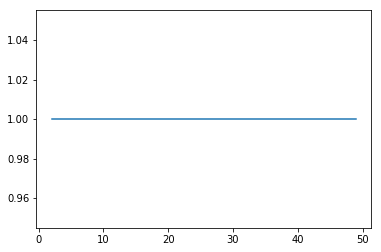

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

A = []

for i in range(2, 50):
  
  parzen = KernelDensity(kernel='gaussian', bandwidth=1).fit(X_train)
  P_train = parzen.score_samples(X_train)
  
  y_hat = bayesian_classifier(m_train, S_train, P_train, X_test)
  
  error = calculate_error(y_hat[:,0], y_test)
  
  A.append(np.array([i, error]))
  

A = np.vstack(A)  
lowest = np.where(A == np.amin(A[:,1]))


plt.plot(A[:,0], A[:,1])
plt.show()

## Problem 4

Repeat exercise (3) but use k-NN instead of parzen windows. Use different
values of k and choose the one that results in the best error performance of the classifier.
Make a plot to justify your choice.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

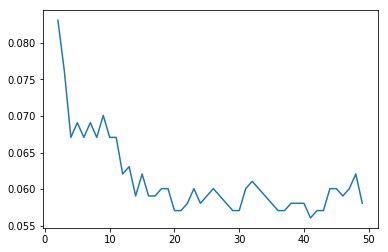

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

A = []

for i in range(2, 50):
  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train) 
  
  y_hat = knn.predict(X_test)
  
  #am I supposed to use this as a P for bayesian classfiication or just proceed
  
  error = calculate_error(y_hat, y_test)
  
  A.append(np.array([i, error]))
  

A = np.vstack(A)  
lowest = np.where(A == np.amin(A[:,1]))


plt.plot(A[:,0], A[:,1])
plt.show()

In [0]:
A

array([[ 2.        ,  0.08308308],
       [ 3.        ,  0.07607608],
       [ 4.        ,  0.06706707],
       [ 5.        ,  0.06906907],
       [ 6.        ,  0.06706707],
       [ 7.        ,  0.06906907],
       [ 8.        ,  0.06706707],
       [ 9.        ,  0.07007007],
       [10.        ,  0.06706707],
       [11.        ,  0.06706707],
       [12.        ,  0.06206206],
       [13.        ,  0.06306306],
       [14.        ,  0.05905906],
       [15.        ,  0.06206206],
       [16.        ,  0.05905906],
       [17.        ,  0.05905906],
       [18.        ,  0.06006006],
       [19.        ,  0.06006006],
       [20.        ,  0.05705706],
       [21.        ,  0.05705706],
       [22.        ,  0.05805806],
       [23.        ,  0.06006006],
       [24.        ,  0.05805806],
       [25.        ,  0.05905906],
       [26.        ,  0.06006006],
       [27.        ,  0.05905906],
       [28.        ,  0.05805806],
       [29.        ,  0.05705706],
       [30.        ,